<a href="https://colab.research.google.com/github/matthewpecsok/4482_fall_2022/blob/main/labs/Lab3_Classification_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/titanic.train.csv")

In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
from sklearn import tree

In [9]:
titanic = titanic.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

In [10]:
titanic = titanic.dropna()

In [11]:
titanic['Pclass'] = titanic['Pclass'].astype('object')

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [13]:
y_target = titanic.pop('Survived')

# use pandas get_dummies to one-hot-encode categorical values
# we would expect only numeric values left in our dataframe
# rename this df as encoded so we understand it's the encoded version
# of the original
titanic_encoded_X = pd.get_dummies(titanic)

In [14]:
titanic_encoded_X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### model 1

In [15]:
tree_model_1 = tree.DecisionTreeClassifier(random_state=123,max_leaf_nodes=2,criterion='entropy')
tree_model_1.fit(titanic_encoded_X,y_target)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=2, random_state=123)

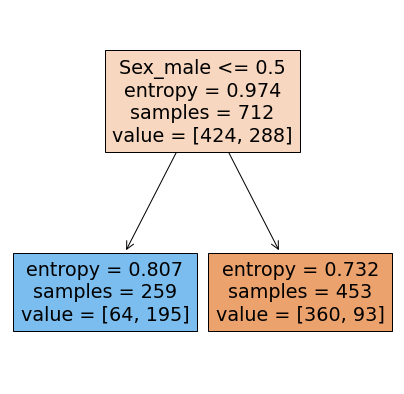

In [16]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_1,
                   feature_names=titanic_encoded_X.columns.to_list(),
                   filled=True)

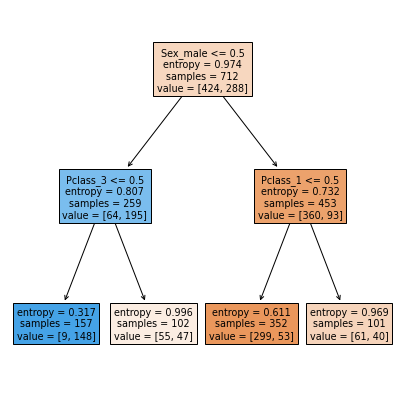

In [17]:
tree_model_2 = tree.DecisionTreeClassifier(random_state=123,max_leaf_nodes=4,criterion='entropy')
tree_model_2.fit(titanic_encoded_X,y_target)

fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_2,
                   feature_names=titanic_encoded_X.columns.to_list(),
                   filled=True)

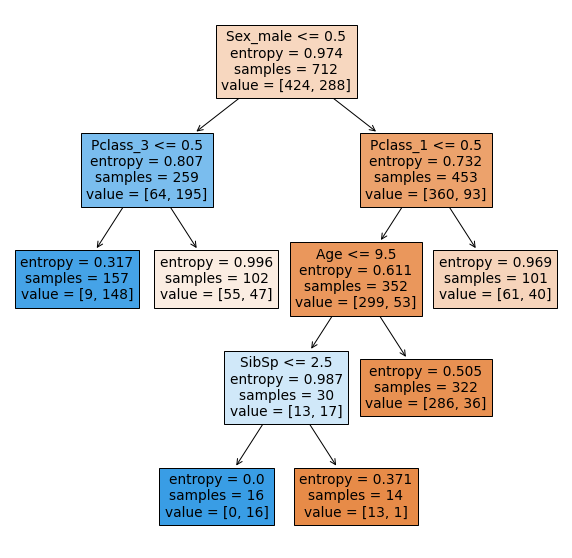

In [18]:
tree_model_3 = tree.DecisionTreeClassifier(random_state=123,max_leaf_nodes=6,criterion='entropy')
tree_model_3.fit(titanic_encoded_X,y_target)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(tree_model_3,
                   feature_names=titanic_encoded_X.columns.to_list(),
                   filled=True)

In [19]:
tree_model_3.feature_importances_

array([0.08269506, 0.08842456, 0.        , 0.        , 0.06803105,
       0.        , 0.20877663, 0.        , 0.5520727 , 0.        ,
       0.        , 0.        ])

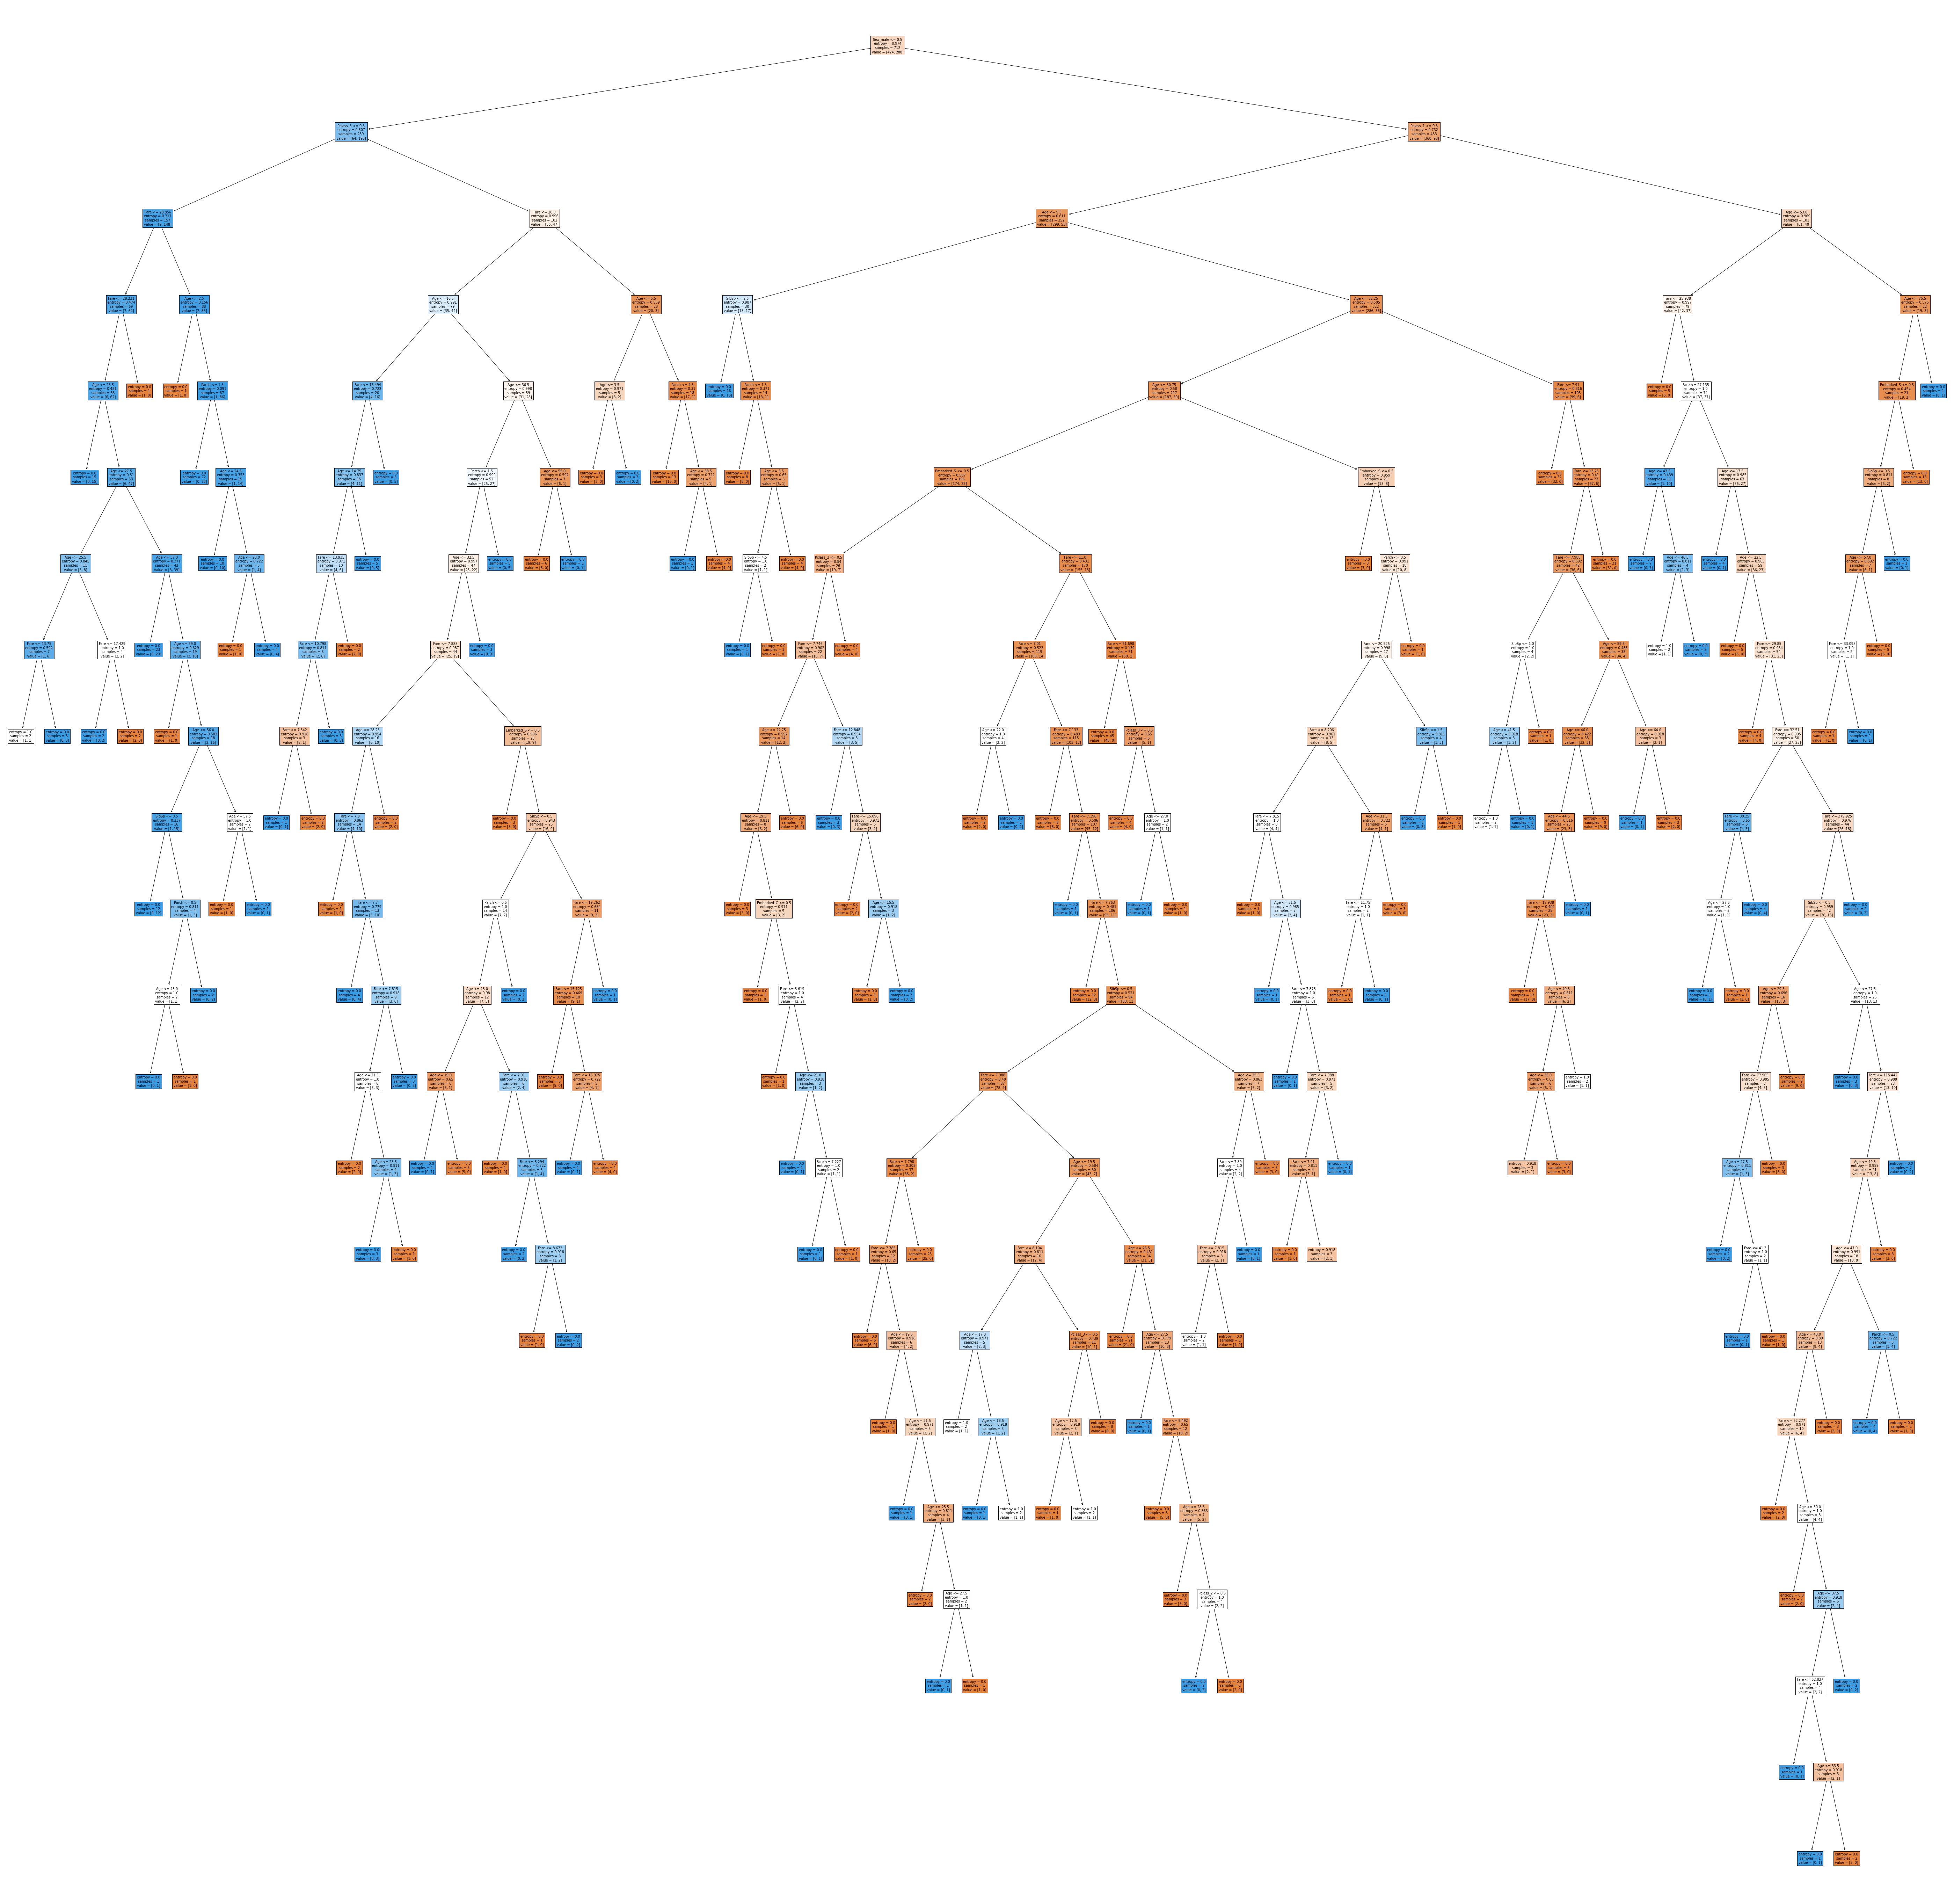

In [20]:
tree_model_3 = tree.DecisionTreeClassifier(random_state=123,max_leaf_nodes=6000,criterion='entropy')
tree_model_3.fit(titanic_encoded_X,y_target)

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(tree_model_3,
                   feature_names=titanic_encoded_X.columns.to_list(),
                   filled=True)